# Children Under Five Years Mortality
- Child mortality in most African countries tends to decrease in recent times due to innovative health care delivery, which did not exist back in the day. The graph below shows declining child under five years mortality rate per 1000 live birth. Looking at the points, in 2010 the child mortality rate was above 100 per 1000 live births. In 2020, the child mortality rate was close to 50 per 1000 live births.
- We used machine learning to build a predictive model for child survival and identify the factors that highly influence the survival or death using data collected before and after pregnancy from mother by Health practitioners. Here, we will use classification to predict based on the Dataset collected which child will survive or die using the trends we find in our analysis.

## Overview of the Data Set
1. Data Set Information
  - Title: Child Under Five year Mortality
  - Total Number of Entries : 23118
  - No. of Columns: 23
      
2. Data Source:
     - Creator: Demographic and Health Surveys (DHS) Program
     - Date introduced: 1988 to 2018 but we are using 2014 data set.

3. Relevant Information:
   -Some independent variables are antennal care visits(antevisit), sleeping under mosquito nets(mosqnet), wealth index(wealth), easy access to healthcare(distance), smoking mothers(smoke), Age of mothers(current_age), mothers with anemia(mothanemic) and others. 

4. Past Usage:
  - No past usage for classification


   

**Install necessary libraries**

In [ ]:
!pip install numpy
!pip install pandas
!pip install -U scikit-learn
!pip install pingouin

     |████████████████████████████████| 182 kB 4.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 29.5 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193661 sha256=f69df852518e55972eb783d298be83698b5df128126cbc6d9dacfa45ae1c9b8b
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=2de2e29e1ef9d58f09bdea39d583dd935921f3b71e47d2c87ef75645f26e669d
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsm

**Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import pingouin as pg
from sklearn import datasets
from sklearn.linear_model import LogisticRegression # Logistic Regression classifier
from sklearn.model_selection import train_test_split  # for splitting the data into train and test sets

from sklearn.metrics import accuracy_score  # for calculating accuracy
from sklearn.metrics import precision_recall_fscore_support  # for calculating precision, recall, and F1-score

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression

#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import RandomForestClassifier

# grid search
from sklearn.model_selection import GridSearchCV

#ignore warning
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
!pip install -q findspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

import findspark
findspark.init()

from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [ ]:
# To use Spark and its API import the SparkContext
from pyspark import SparkContext
from pyspark.sql import SparkSession
# Create Spark Context
sc = SparkSession.builder.master("local[*]")\
     .config("spark.jars.packages", "org.apache.spark:spark-avro_2.12:3.1.2")\
     .getOrCreate()

In [ ]:
# Load Data
df = sc.read.format("csv").load("sample_data/new_data.csv", header=True)

df.show(5)

+-----------------+---------+--------+-------------+-------+----------+----------+-------+-----------+----------+-----+--------+---------+--------+--------+-----------+--------+---------+-----+--------------------+------+---------+-------+
|underfivesurvival|antevisit|time_int|placedelivery|mosqnet|mothanemic|pregwanted|marstat|current_age|occupation|media|religion|residence|distance|prebirth|first_child|polygyny|edu_level|smoke|        source_water|wealth|ethnicity| region|
+-----------------+---------+--------+-------------+-------+----------+----------+-------+-----------+----------+-----+--------+---------+--------+--------+-----------+--------+---------+-----+--------------------+------+---------+-------+
|                1|        1|       1|            1|      1|         1|         0|      1|         40|         1|    1|       1|        0|       0|      10|          1|       1|  primary|   no|tube well or bore...|poorer|     akan|western|
|                0|        0|    null|  

In [ ]:
# Converting Spark DataFrame to Pandas DataFrame for Data Cleaning
df = df.toPandas()
df.head(2)

,underfivesurvival,antevisit,time_int,placedelivery,mosqnet,mothanemic,pregwanted,marstat,current_age,occupation,media,religion,residence,distance,prebirth,first_child,polygyny,edu_level,smoke,source_water,wealth,ethnicity,region
0,1,1,1,1,1,1,0,1,40,1,1,1,0,0,10,1,1,primary,no,tube well or borehole,poorer,akan,western
1,0,0,None,1,1,1,0,1,None,1,1,1,0,0,9,1,1,primary,no,tube well or borehole,poorer,akan,western


In [ ]:
# Looking for total number rows and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23118 entries, 0 to 23117
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   underfivesurvival  23118 non-null  object
 1   antevisit          4456 non-null   object
 2   time_int           4292 non-null   object
 3   placedelivery      5882 non-null   object
 4   mosqnet            23118 non-null  object
 5   mothanemic         11695 non-null  object
 6   pregwanted         1684 non-null   object
 7   marstat            23118 non-null  object
 8   current_age        20862 non-null  object
 9   occupation         23118 non-null  object
 10  media              23118 non-null  object
 11  religion           23118 non-null  object
 12  residence          23118 non-null  object
 13  distance           23112 non-null  object
 14  prebirth           23118 non-null  object
 15  first_child        23118 non-null  object
 16  polygyny           19368 non-null  objec

# Business Analytic And Data Visualisation


In [ ]:
# Visualization for child survival
a = (df.groupby('underfivesurvival').size()/df.shape[0]).round(2).reset_index() 
a.columns=['underfivesurvival','Probability']
px.bar(a,x='underfivesurvival',y='Probability',text='Probability')

_ From the visualization, the number of children that survived exceeds the the number of children that died.

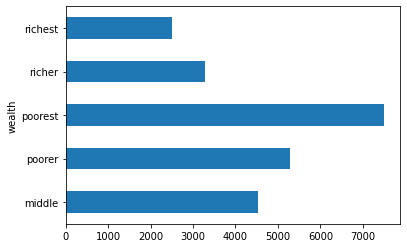

In [ ]:
df.groupby('wealth').size().plot(kind='barh')

The visualization shows the weath of each mother that participated in the survey. We have a number of them being poorest.

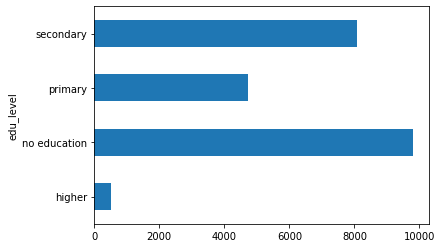

In [ ]:
# visualizing the educational level of the mothers
df.groupby('edu_level').size().plot(kind='barh')

- As we can see above, a lot of mothers are not educated. Mothers with the highest education are the least represented.

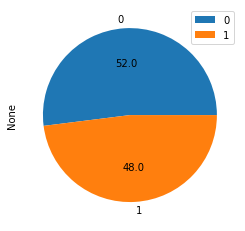

In [ ]:
# data visualisation for mother and children that sleeps under mosquitoe net
df.groupby('mosqnet').size().plot(kind='pie', autopct='%.1f', legend=True)

From the pie chart, we can see that 52% of mothers and children do not sleep under mosquitoe nets and 48% do sleep under mosquitoe nets.

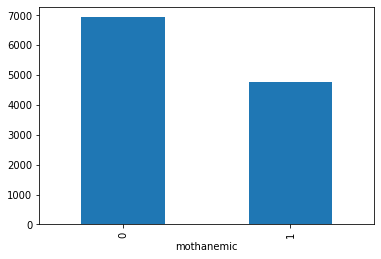

In [ ]:
# data visualisation for left and satisfaction_level
df.groupby(['mothanemic']).size().plot(kind='bar')

- From the visualization above, the number of mothers with anemic conditions is low than those mothers with no anemic conditions.

In [ ]:
# visualization for mothers who smoke
df.groupby('smoke').size()

smoke
no     23104
yes        8
dtype: int64

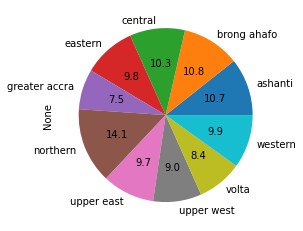

In [ ]:
# data visualisation for left and satisfaction_level
df.groupby(['region']).size().plot(kind='pie', autopct='%.1f')

- From our visualization, we have the northern region with the highest number of people who did the survey. Followed by Brong Ahafo region.

# Data Cleaning

In [ ]:
# Let us get dummies for descriptive analysis
## Categorical to Dummy Variables
df =  pd.get_dummies(df, columns=["region", "smoke", "edu_level", "source_water", "wealth", "ethnicity"],
                         prefix=["region", "smoke", "edu_level", "source_water", "wealth", "ethnicity"],
                         drop_first=True)
df.head(2)

,underfivesurvival,antevisit,time_int,placedelivery,mosqnet,mothanemic,pregwanted,marstat,current_age,occupation,media,religion,residence,distance,prebirth,first_child,polygyny,region_brong ahafo,region_central,region_eastern,region_greater accra,region_northern,region_upper east,region_upper west,region_volta,region_western,smoke_yes,edu_level_no education,edu_level_primary,edu_level_secondary,source_water_cart with small tank,source_water_not a dejure resident,source_water_piped into dwelling,source_water_piped to yard/plot,source_water_protected spring,source_water_protected well,source_water_public tap/standpipe,source_water_rainwater,source_water_river/dam/lake/ponds/stream/canal/irrigation channel,source_water_sachet water,source_water_tanker truck,source_water_tube well or borehole,source_water_unprotected spring,source_water_unprotected well,wealth_poorer,wealth_poorest,wealth_richer,wealth_richest,ethnicity_ewe,ethnicity_ga/dangme,ethnicity_grusi,ethnicity_guan,ethnicity_gurma,ethnicity_mande,ethnicity_mole-dagbani,ethnicity_other
0,1,1,1,1,1,1,0,1,40,1,1,1,0,0,10,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,None,1,1,1,0,1,None,1,1,1,0,0,9,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Converting data to numbers
for cols in  df.columns:
  df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
# finding information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23118 entries, 0 to 23117
Data columns (total 56 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   underfivesurvival                                                  23118 non-null  int64  
 1   antevisit                                                          4456 non-null   float64
 2   time_int                                                           4292 non-null   float64
 3   placedelivery                                                      5882 non-null   float64
 4   mosqnet                                                            23118 non-null  int64  
 5   mothanemic                                                         11695 non-null  float64
 6   pregwanted                                                         1684 non-null   float64
 7   marstat               

In [ ]:
# Checking for missing values
df.isnull().sum()

underfivesurvival                                                        0
antevisit                                                            18662
time_int                                                             18826
placedelivery                                                        17236
mosqnet                                                                  0
mothanemic                                                           11423
pregwanted                                                           21434
marstat                                                                  0
current_age                                                           2256
occupation                                                               0
media                                                                    0
religion                                                                 0
residence                                                                0
distance                 

In [ ]:
# finding the median
df.antevisit.median()

1.0

In [ ]:
# finding the median
df.time_int.median()

1.0

In [ ]:
# finding the median
df.placedelivery.median()

1.0

In [ ]:
# finding the median
df.mothanemic.median()

0.0

In [ ]:
# finding the median
df.pregwanted.median()

1.0

In [ ]:
# finding the median
df.polygyny.median()

0.0

In [ ]:
# finding the mean for distance
df.distance.mean()

0.32641052267220494

In [ ]:
# finding the median for age
df.current_age.median()

25.0

In [ ]:
# All binary columns with no value will be replace with their respective medians
df = df.fillna({'antevisit': 1})
df = df.fillna({'time_int': 1})
df = df.fillna({'placedelivery': 1})
df = df.fillna({'mothanemic': 0})
df = df.fillna({'pregwanted': 1})
df = df.fillna({'polygyny': 0})
df = df.fillna({'current_age': 25})

# replacing null value with the mean
df = df.fillna({'distance': 0.32641052267220494})


# Decriptive Analysis

In [ ]:
# Descriptive Analysis
df.describe()

,underfivesurvival,antevisit,time_int,placedelivery,mosqnet,mothanemic,pregwanted,marstat,current_age,occupation,media,religion,residence,distance,prebirth,first_child,polygyny,region_brong ahafo,region_central,region_eastern,region_greater accra,region_northern,region_upper east,region_upper west,region_volta,region_western,smoke_yes,edu_level_no education,edu_level_primary,edu_level_secondary,source_water_cart with small tank,source_water_not a dejure resident,source_water_piped into dwelling,source_water_piped to yard/plot,source_water_protected spring,source_water_protected well,source_water_public tap/standpipe,source_water_rainwater,source_water_river/dam/lake/ponds/stream/canal/irrigation channel,source_water_sachet water,source_water_tanker truck,source_water_tube well or borehole,source_water_unprotected spring,source_water_unprotected well,wealth_poorer,wealth_poorest,wealth_richer,wealth_richest,ethnicity_ewe,ethnicity_ga/dangme,ethnicity_grusi,ethnicity_guan,ethnicity_gurma,ethnicity_mande,ethnicity_mole-dagbani,ethnicity_other
count,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000
mean,0.910978,0.967082,0.932217,0.922355,0.480189,0.205900,0.980448,1.098927,26.064928,0.894368,0.867938,0.954235,0.396747,0.326411,1.950601,0.718358,0.194827,0.107579,0.102604,0.097586,0.074833,0.140583,0.097067,0.089843,0.083961,0.099273,0.000346,0.424085,0.203867,0.349684,0.000173,0.012761,0.026343,0.045679,0.002812,0.061511,0.205597,0.004196,0.106108,0.122502,0.001168,0.356259,0.009862,0.042867,0.228523,0.324812,0.141924,0.108271,0.107622,0.049442,0.043559,0.027727,0.089843,0.012025,0.264253,0.016783
std,0.284781,0.178426,0.251378,0.267618,0.499618,0.404367,0.138457,0.390036,6.096233,0.307373,0.338565,0.208980,0.489233,0.468849,1.933416,0.449809,0.396076,0.309854,0.303448,0.296761,0.263128,0.347598,0.296056,0.285963,0.277335,0.299035,0.018600,0.494214,0.402880,0.476880,0.013153,0.112242,0.160157,0.208792,0.052952,0.240270,0.404146,0.064641,0.307982,0.327872,0.034156,0.478903,0.098821,0.202562,0.419890,0.468315,0.348980,0.310729,0.309909,0.216794,0.204116,0.164194,0.285963,0.109001,0.440944,0.128462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,25.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000

In [ ]:
# Pivot talbe for cancelled to find the the number of children who died and survived.
df.groupby(['underfivesurvival']).size()

underfivesurvival
0     2058
1    21060
dtype: int64

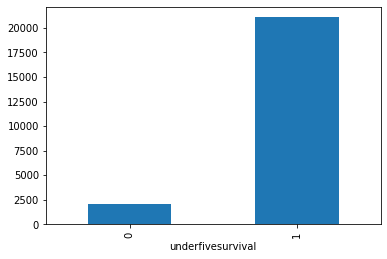

In [ ]:
# plot for cancelled
df.groupby(['underfivesurvival']).size().plot(kind='bar')

The above visualization shows more survival that children who did not survive.

# Exploratory Analysis

In [ ]:
# Correlation Analysis
df.corr()

,underfivesurvival,antevisit,time_int,placedelivery,mosqnet,mothanemic,pregwanted,marstat,current_age,occupation,media,religion,residence,distance,prebirth,first_child,polygyny,region_brong ahafo,region_central,region_eastern,region_greater accra,region_northern,region_upper east,region_upper west,region_volta,region_western,smoke_yes,edu_level_no education,edu_level_primary,edu_level_secondary,source_water_cart with small tank,source_water_not a dejure resident,source_water_piped into dwelling,source_water_piped to yard/plot,source_water_protected spring,source_water_protected well,source_water_public tap/standpipe,source_water_rainwater,source_water_river/dam/lake/ponds/stream/canal/irrigation channel,source_water_sachet water,source_water_tanker truck,source_water_tube well or borehole,source_water_unprotected spring,source_water_unprotected well,wealth_poorer,wealth_poorest,wealth_richer,wealth_richest,ethnicity_ewe,ethnicity_ga/dangme,ethnicity_grusi,ethnicity_guan,ethnicity_gurma,ethnicity_mande,ethnicity_mole-dagbani,ethnicity_other
underfivesurvival,1.000000,-0.029580,-0.052872,-0.034506,0.007670,-0.000097,-0.011232,-0.020800,0.054609,-0.013536,0.032401,0.014403,0.023443,-0.035394,-0.003666,0.025456,-0.037986,0.014901,-0.001923,0.017318,0.032332,-0.048367,-0.000121,-0.035644,0.016317,0.018949,0.005816,-0.076296,0.011145,0.064550,0.004112,0.019300,0.001152,0.008008,-0.006350,-0.011640,0.007186,0.013242,-0.001790,0.034797,0.010689,-0.031978,-0.007229,-0.001335,-0.003147,-0.048503,0.030503,0.030221,0.022294,0.014540,0.004201,-0.001792,-0.023427,0.002436,-0.044841,-0.002908
antevisit,-0.029580,1.000000,0.413190,0.274417,-0.022602,-0.020571,0.215589,0.042445,-0.051167,0.046232,0.050485,0.016442,0.041589,-0.032372,-0.070672,-0.028205,-0.005348,0.028847,-0.006326,-0.040633,0.024830,-0.045348,0.039200,0.029988,-0.011457,-0.025501,0.003433,0.002320,-0.018569,0.005648,-0.016005,-0.002785,0.021264,0.010174,-0.031411,-0.017346,0.017073,0.000724,-0.033261,0.031962,-0.007888,-0.008043,-0.006120,-0.002846,-0.014489,-0.014401,0.019455,0.029176,-0.003207,-0.029495,0.019181,-0.004281,-0.073445,0.004785,0.046788,-0.013641
time_int,-0.052872,0.413190,1.000000,0.317222,-0.013965,-0.016748,-0.000793,0.091778,-0.130392,0.081445,0.027477,0.009293,0.018538,-0.020009,-0.109602,-0.047566,0.006210,-0.002457,-0.002393,-0.002367,-0.002443,-0.061243,0.017498,0.014313,-0.000269,0.029672,-0.004235,0.017250,-0.007492,-0.017337,-0.009536,-0.015338,0.019641,0.011191,0.001319,0.006007,-0.009720,0.006855,-0.013259,0.020449,-0.000856,-0.008531,-0.002691,-0.001552,-0.017583,-0.021320,0.011536,0.031933,-0.003530,-0.005179,0.007804,0.015143,-0.047669,-0.009719,0.002375,-0.000938
placedelivery,-0.034506,0.274417,0.317222,1.000000,-0.059226,-0.042536,0.004558,0.059501,-0.125693,0.055949,0.096417,0.057896,0.146419,-0.090705,-0.164087,-0.093629,-0.042968,0.024572,0.003289,0.000636,0.057331,-0.144926,0.047629,-0.009457,-0.014158,0.006052,0.005398,-0.081037,-0.011659,0.080903,0.003817,0.005624,0.044696,0.047219,0.003196,0.010368,0.034815,0.003830,-0.089504,0.079320,0.009921,-0.063628,-0.016843,-0.009619,-0.039959,-0.126659,0.088817,0.090695,0.002702,0.019944,0.008068,0.000759,-0.136639,0.011249,-0.002444,-0.007391
mosqnet,0.007670,-0.022602,-0.013965,-0.059226,1.000000,0.030898,-0.039368,-0.041110,0.004477,0.006935,-0.011760,-0.027328,-0.270648,0.085598,0.034723,0.019924,-0.003666,0.114223,0.018830,0.006330,-0.164106,-0.026307,-0.057187,0.008977,0.117059,0.022575,0.005393,0.025619,0.039301,-0.047177,0.013687,-0.026733,-0.060243,-0.063894,0.002923,0.022404,-0.063057,0.024675,0.085772,-0.162378,-0.007516,0.124778,0.017100,0.054342,0.129941,0.117448,-0.143527,-0.170784,0.085572,-0.057053,0.009947,0.043872,0.028052,0.008346,-0.054876,-0.019757
mothanemic,-0.000097,-0.020571,-0.016748,-0.042536,0.030898,1.000000,-0.006129,0.006063,0.007457,-0.015729,-0.012761,0.008110,-0.013233,0.022198,0.002664,0.002049,0.000439,-0.014181,0.011495,-0.006312,0.003168,0.040571,-0.022779,-

## First of all we need to explain the positives and negatives associated with the numbers obtained.
- Positive Correlation; A positive correlation is a relationship between 2 variables which the increase of one variable causes an increase for another variable.
- Negative Correlation; The Negative correlation is the opposite, it’s a relationship between 2 variables which the increase of one variable causes a decrease for another variable. This applies otherwise.
- From the above, we can see a positive relationship between variable mosqnet and the target variable underfivesurvival. There is a negative relationship between antevisit and underfivesurvival.

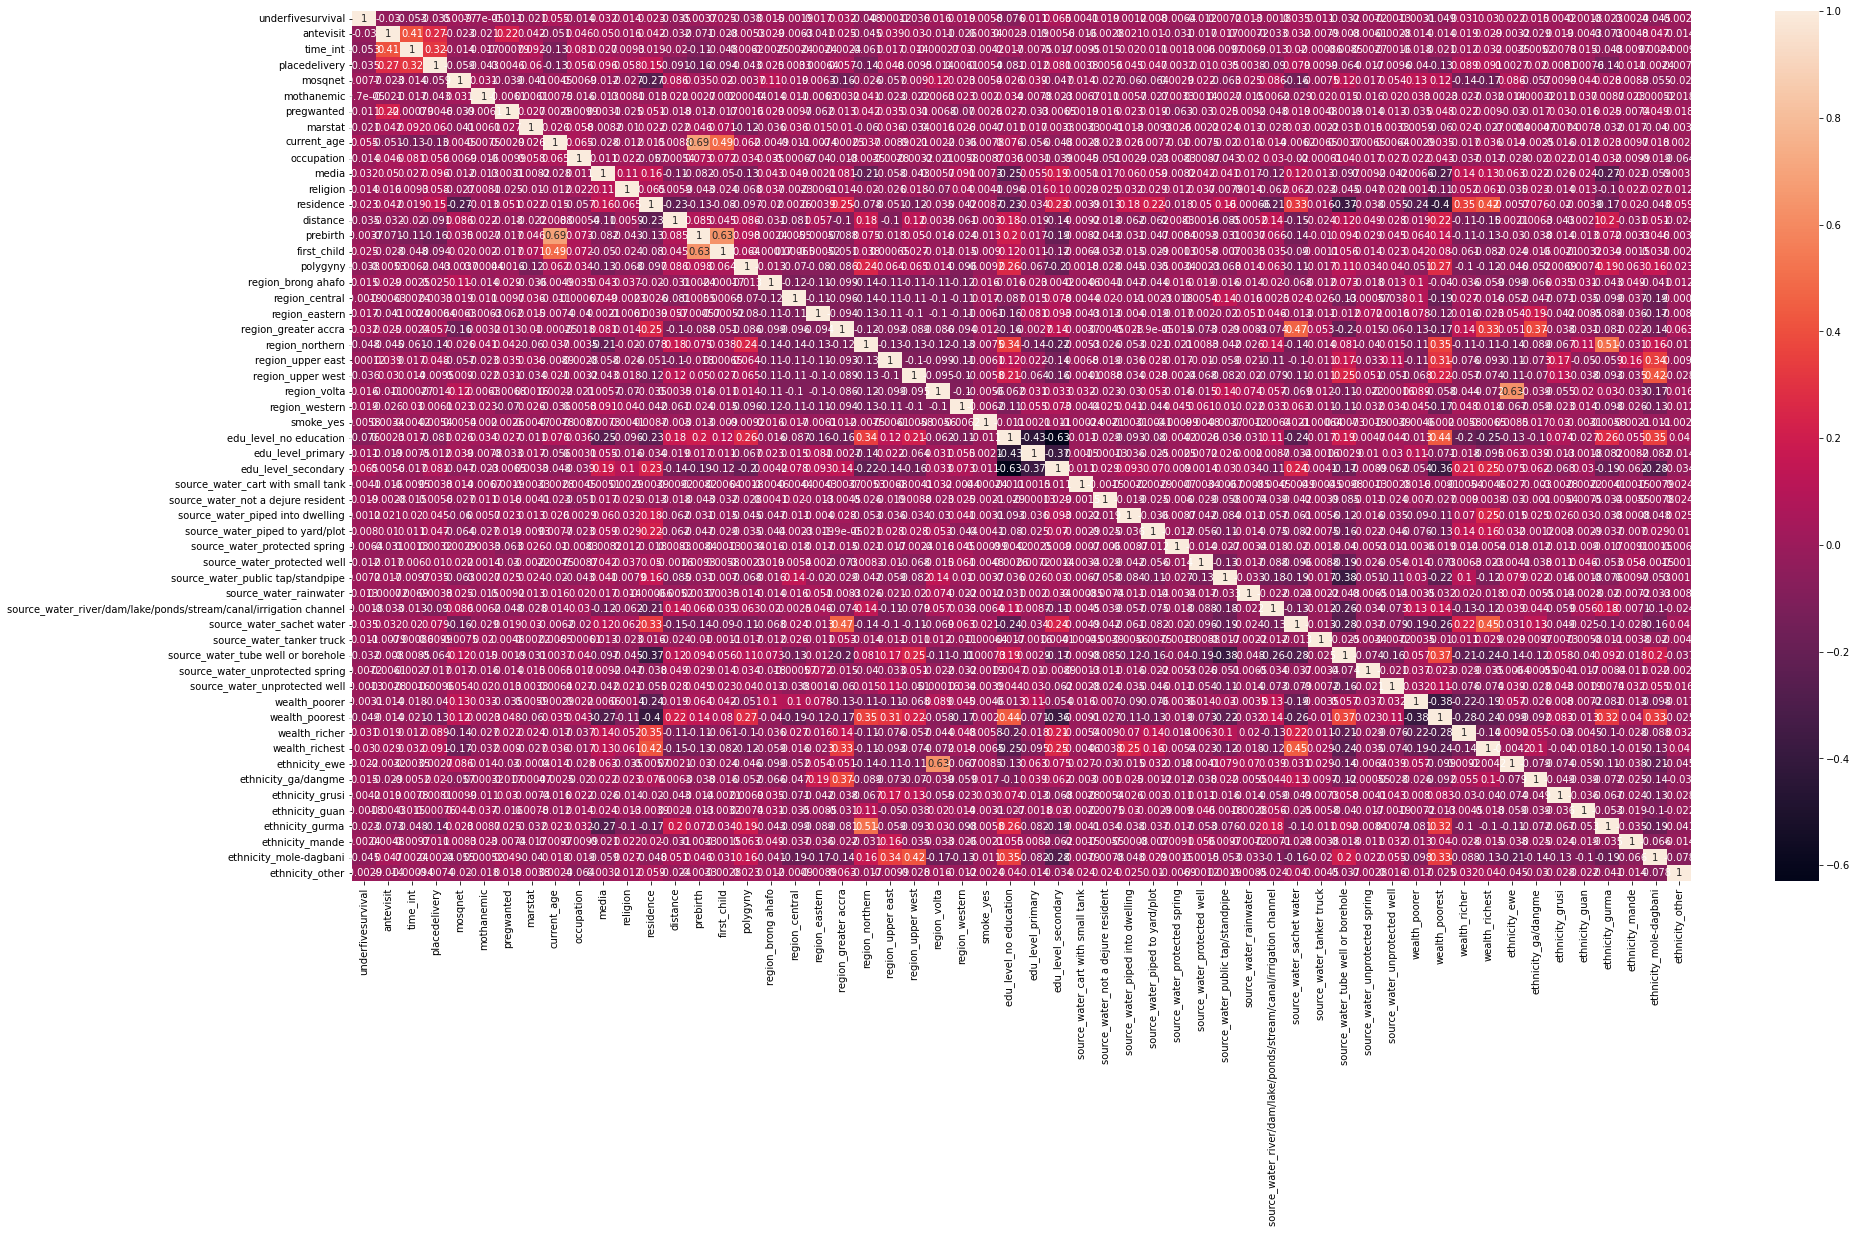

In [ ]:
# heatmap for correlation
plt.figure(figsize=(30,16))
sns.heatmap(df.corr(), annot=True)

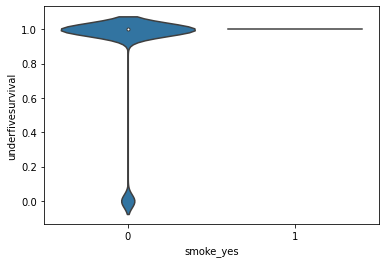

In [ ]:
# data visualisation for 
sns.violinplot(x="smoke_yes", y="underfivesurvival", data=df)

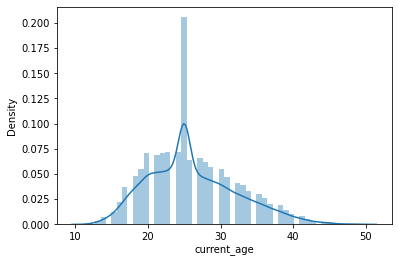

In [ ]:
# The distribution graph for Age. It shows the meadian of the distribution.
sns.distplot(df.current_age)

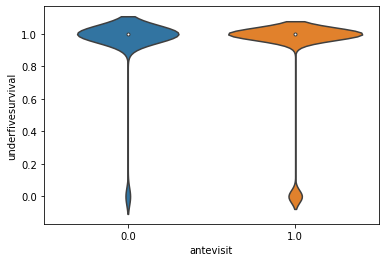

In [ ]:
# data visualisation for 
sns.violinplot(x="antevisit", y="underfivesurvival", data=df)

- From the visualization, we can see that the number of children that survived and their mothers visited antenatal care had a high survival rate. As compared to those whose mothers did not visit antenatal care.

# Statistical Inference

In [ ]:
# T-test for clients who is less likely or more likely in relation to age if their mean values are the same
no = df[df['underfivesurvival'] == 0]['current_age']
yes = df[df['underfivesurvival'] == 1]['current_age']

pg.ttest(no, yes, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.315078,23116,two-sided,9.669031e-17,"[-1.44, -0.89]",0.192039,2.381e+13,1.0


In [ ]:
# T-test for clients who is less likely or more likely in relation to age if their mean values are the same
no = df[df['underfivesurvival'] == 0]['distance']
yes = df[df['underfivesurvival'] == 1]['distance']

pg.ttest(no, yes, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.384724,23116,two-sided,7.326351e-08,"[0.04, 0.08]",0.124362,4.954e+04,0.999692


- Null hypothesis says two means are almost same.
- p-value is a probability if the null hypothesis is true. A high p-value (> 0.05) means we can't reject the null hypothesis
- The above shows distance with a p-value less than 0.05 therefore their means are not the same. Age has a p-value less than 0.05 therefore their means are not the same.

In [ ]:
### c. checking for p-value (TESTING FOR STATISTICAL SIGNIFICANCE OF INDEPENDENT VARIABLES)
import scipy.stats as stats
cl_corr = pd.DataFrame() # Correlation matrix
cl_p = pd.DataFrame() # Matrix of p-values
for x in df.columns:   # assuming cl as your dataframe name
   for y in df.columns:
      corr = stats.pearsonr(df[x], df[y])
      cl_corr.loc[x,y] = corr[0]
      cl_p.loc[x,y] = corr[1]

cl_p['underfivesurvival']

underfivesurvival                                                    0.000000e+00
antevisit                                                            6.851637e-06
time_int                                                             8.687923e-16
placedelivery                                                        1.538852e-07
mosqnet                                                              2.435451e-01
mothanemic                                                           9.882680e-01
pregwanted                                                           8.769242e-02
marstat                                                              1.563247e-03
current_age                                                          9.669031e-17
occupation                                                           3.958100e-02
media                                                                8.331116e-07
religion                                                             2.853100e-02
residence       

- At the confidence level of 95%, we have some predictors not statistically significant and in appropriation, we are to drop these variables. But in reality or the real world, some predictors may not be statistically signifcant but a high influence on the predicted variable.
- For instance, in the reality, mothers who have anemic conditions are at risk to lose their child but hre we see that motheranemic variable is not statistically significant.  

# Model Building

In [ ]:
# Separating target variable and predictors
y = df['underfivesurvival']
x = df.drop(['underfivesurvival'], axis=1)

In [ ]:
# Normalization data to bring all values to common scale
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x)
X[0:1]

array([[ 0.18449541,  0.26965022,  0.29014031,  1.04043985,  1.96385404,
        -7.0813853 , -0.25364136,  2.28589906,  0.34366837,  0.39007114,
         0.21899797, -0.81097449, -0.69621086,  4.16339442,  0.62614981,
         2.03292176, -0.34719843, -0.33813502, -0.32884525, -0.28440548,
        -0.40444978, -0.32787521, -0.31418472, -0.30274749,  3.01217573,
        -0.01860566, -0.85811872,  1.97614674, -0.7332902 , -0.01315505,
        -0.11369062, -0.16448661, -0.21878096, -0.05309981, -0.25601179,
        -0.50873128, -0.06491182, -0.34453319, -0.37363574, -0.03419483,
         1.34422659, -0.09980321, -0.21162918,  1.83736844, -0.6935911 ,
        -0.40669152, -0.34844863, -0.34727664, -0.22806502, -0.21340792,
        -0.16887285, -0.31418472, -0.1103251 , -0.59930192, -0.13065202]])

In [ ]:
# splitting data into training and test data at 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state =100)

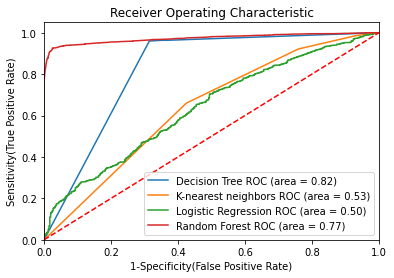

In [ ]:
# Test four classification algorithms to see which one yields the highest Area Under the Curve
## Best model selection

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'K-nearest neighbors',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='lbfgs', max_iter=20000),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=100),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    #y_pred=model.predict(X_test) # predict the test data
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

- We have Decision Tree Classifer witht he highest Area Under the Curve with 82%. 

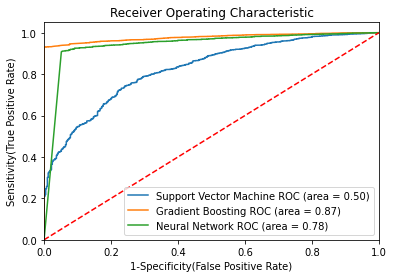

In [ ]:
# Best model selection for advance algorithms
# advanced algorthms
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Support Vector Machine',
    'model': SVC(gamma='auto', probability=True),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
{
    'label': 'Neural Network',
    'model': MLPClassifier(solver='lbfgs', max_iter=15000),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    #y_pred=model.predict(X_test) # predict the test data
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

- We have Gradient Boosting Classifier having the highest Area Under the Curve with 87%. 

# Decision Tree

In [ ]:
# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train a decision tree model
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

0.9370065967340759

In [ ]:
# Use the trained classifier to predict class labels for the test set
d_pred = dt.predict(X_test)

In [ ]:
accuracy = accuracy_score(d_pred, y_test)
print (accuracy)

0.9366349480968859


In [ ]:
# Calculating Precision, Recall, and F1-score for each class using Y_test and Y_pred
precision, recall, f1measure, support = precision_recall_fscore_support(y_test, d_pred, average='weighted')
print (precision)
print (recall)
print (f1measure)

0.9631577483934749
0.9366349480968859
0.9438803821511923


## Get the Logistic Regression classifier

In [ ]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', max_iter=20000)

**Train the classifier**


In [ ]:
# TODO: Train the classifier using X_train and Y_train
cif = logreg.fit(X_train, y_train)
cif.score(X_train, y_train)

0.9107278036119822

**Use the trained model to predict class labels for the test set examples**



In [ ]:
# Use the trained classifier to predict class labels for the test set
Y_pred = cif.predict(X_test)

In [ ]:
# Calculating Accuracy
accuracy = accuracy_score(Y_pred, y_test)
print (accuracy)

0.9119809688581315


In [ ]:
# Calculating Precision, Recall, and F1-score for each class using Y_test and Y_pred
precision, recall, f1measure, support = precision_recall_fscore_support(y_test, Y_pred, average='weighted')
print (precision)
print (recall)
print (f1measure)

0.8317092875594162
0.9119809688581315
0.8699974540605679


# Using Random Forest Classifier For Model Building

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)    #building 100 decision trees
rfc=rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.996485346598897

In [ ]:
# Use the trained classifier to predict class labels for the test set
R_pred = rfc.predict(X_test)

In [ ]:
# Calculating Accuracy
accuracy = accuracy_score(R_pred, y_test)
print (accuracy)


0.9407439446366782


In [ ]:
# Calculating Precision, Recall, and F1-score for each class using Y_test and Y_pred
precision, recall, f1measure, support = precision_recall_fscore_support(y_test, R_pred, average='weighted')
print (precision)
print (recall)
print (f1measure)

0.9371507219374978
0.9407439446366782
0.9385174203782756


# Using Gradient Boosting Classifier For Model Building

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=0) 

# fit the model
gb.fit(X_train, y_train)
gb.score(X_train, y_train)

0.9501459932951227

In [ ]:
# Predicting X_test)
G_pred = gb.predict(X_test)

In [ ]:
# prediction accuracy
accuracy = accuracy_score(G_pred, y_test)
print (accuracy)

0.9452854671280276


In [ ]:
# Calculating Precision, Recall, and F1-score for each class using Y_test and Y_pred
precision, recall, f1measure, support = precision_recall_fscore_support(y_test, G_pred, average='weighted')
print (precision)
print (recall)
print (f1measure)

0.9501523339086273
0.9452854671280276
0.9472479738011513


# Model Evaluation and Deployment

We chose Gradient Boosting Classifier as the best model

In [ ]:
#Model evaluation with Gradient Boosting Classifier
print(metrics.accuracy_score(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, gb.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, gb.predict(X_test)))

0.9452854671280276
--------------------------------------------------------
[[ 316   91]
 [ 162 4055]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.78      0.71       407
           1       0.98      0.96      0.97      4217

    accuracy                           0.95      4624
   macro avg       0.82      0.87      0.84      4624
weighted avg       0.95      0.95      0.95      4624

--------------------------------------------------------
0.8689984204568032


With the model evaluation, we used the confusion matrix on our test data set. From the image above, the first row of the matrix represents non-survival of child mortality under five years (0). 316 represents the number of children who were correctly classified as dead, and 91 children were misclassified as survived.
The second row of the matrix represents children under five years survival (1). 162 number of children misclassified as dead, and 4055 children were correctly classified as survived.
The overall accuracy of the model was 0.95 or 95% with precision 0.98, recall 0.96 and f1Score 0.97. A 95% accuracy tells us the model is fairly good.


### Checking for predictors with high influence on the target label

In [ ]:
pd.DataFrame(gb.feature_importances_, index = x.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).head(10)

,importance
current_age,0.933206
prebirth,0.041245
edu_level_no education,0.005880
first_child,0.005546
residence,0.002007
time_int,0.001479
edu_level_primary,0.001284
edu_level_secondary,0.001281
marstat,0.000999
pregwanted,0.000758


From the top, we have current age of mothers being the most important predictor with 0.93. Followed by prebirth with 0.041, no education with 0.006 and mothers who did not want the pregnancy is the last on the top ten list. 

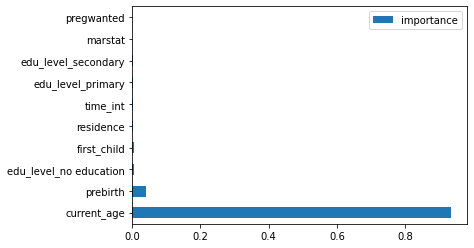

In [ ]:
pd.DataFrame(gb.feature_importances_, index = x.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).head(10).plot(kind='barh')

## Model Deployment

We deploy our model with the original data set to check for accuracy and evaluation. We used the gradient Boosting Classifier for the model deployment. We also checked for the Receiving Operating Characteristics (ROC) with the Area Under Curve (AUC) as the measure of accuracy. We have no baseline for comparison. Below is the confusion matrix for the original data set.

In [ ]:
#Deploying the whole dataset without the target label which is X before splitting.
mod_dep = gb.predict(X)
accuracy = accuracy_score(mod_dep, y)
print (accuracy)

0.9491738039622805


In [ ]:
#Model evaluation with Gradient Boosting Classifier
print(metrics.accuracy_score(y, gb.predict(X)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y, gb.predict(X))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y, gb.predict(X)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y, gb.predict(X)))

0.9491738039622805
--------------------------------------------------------
[[ 1623   435]
 [  740 20320]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.79      0.73      2058
           1       0.98      0.96      0.97     21060

    accuracy                           0.95     23118
   macro avg       0.83      0.88      0.85     23118
weighted avg       0.95      0.95      0.95     23118

--------------------------------------------------------
0.8767460179024804


From the confusion matrix, we have 1623 correctly classified as children who did not survive and 435 misclassified as survived. We also have 740 children misclassified as not survived and 20320 correctly classified as survived. The model deployment accuracy is 0.95 or 95% which is similar to the accuracy we had with the evaluation with the test data. The precision for this original data set is 0.98, recall 0.96 and f1Score 0.97.

In [ ]:
!pip install scikit-plot

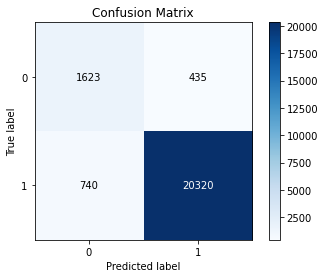

In [ ]:
# Plotting confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true=np.array(y), y_pred=gb.predict(X))
plt.show()

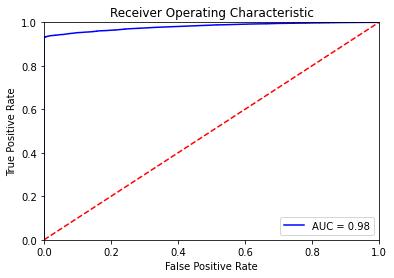

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification

preds = gb.predict_proba(X)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ROC shows the AUC of 0.98. The scale is between 0.0 to 1.0. The ROC curve shows us the trade-off between sensitivity or True Positive Rate and specificity (1 – False Positive Rate). Here we have a better model performance since the curve is closer to 1.

# INSIGHT, FINDINGS AND SUGGESTIONS (Conclusion)

- Our first purpose for this project was to build a predictive model that can predict future survival of child under five years mortality. The second purpose was identifying the most important features or independent variables that have influence on the prediction.
- From the analysis, the age of mother is the most important independent variable. Age had a positive relationship with the target variable underfivesurvived. This means as age increases, the number of children that survived increases and vice versa. There Healthcare practitioners must advice and educate mothers to be ready and well prepared for pregnancy.
- Mothers with no education was an important feature or independent variable. No education had a negative relationship with relationship with the target variable. This means as more mothers with no education increase, the survival of children under five years decreases. Therefore, mothers need education on what to do during pregnancy and after pregnancy.
